---
title: Creating User-defined Functions in SD Models
description: Creating user-defined functions in the SD DSL that is part of the BPTK-Py business simulation framework.
keywords: system dynamics, systemdynamics, sd dsl, bptk, bptk-py, python, business simulation
---

# Creating User-defined Functions in SD Models

One of the benefits of creating System Dynamics models in Python is that we can use the full power of Python to create our own functions, which we can then use in our models.

This how to illustrates how to do this.

First of all, lets set up our model:

In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [2]:
#| echo: false
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [3]:
model = Model(starttime=1,stoptime=10,dt=0.25,name='TestModel')

Now let's define a function we would like to use in our model. A user defined function can have as many arguments as you like, but it must accept at least a model and time parameter (you don't need to use the parameters if you don't want to).

How you define your function is up to you - you can use any of the methods available in Python, such as class methods, using def, or lambda functions.

The example below uses a lambda function which simply multiplies the current time ``t`` with 5.

In [4]:
my_model_function = model.function("my_model_function", lambda model, t: 5*t)

As you can see, much like with stocks and converters, we associate our function with the model by calling the models ``function``method.

Next we set up a converter:

In [5]:
converter = model.converter("converter")

The converters equation calls the model function.

In [6]:
converter.equation = my_model_function()

We can test the function as follows:

In [7]:
converter(5)

25

Let's plot the function over time:

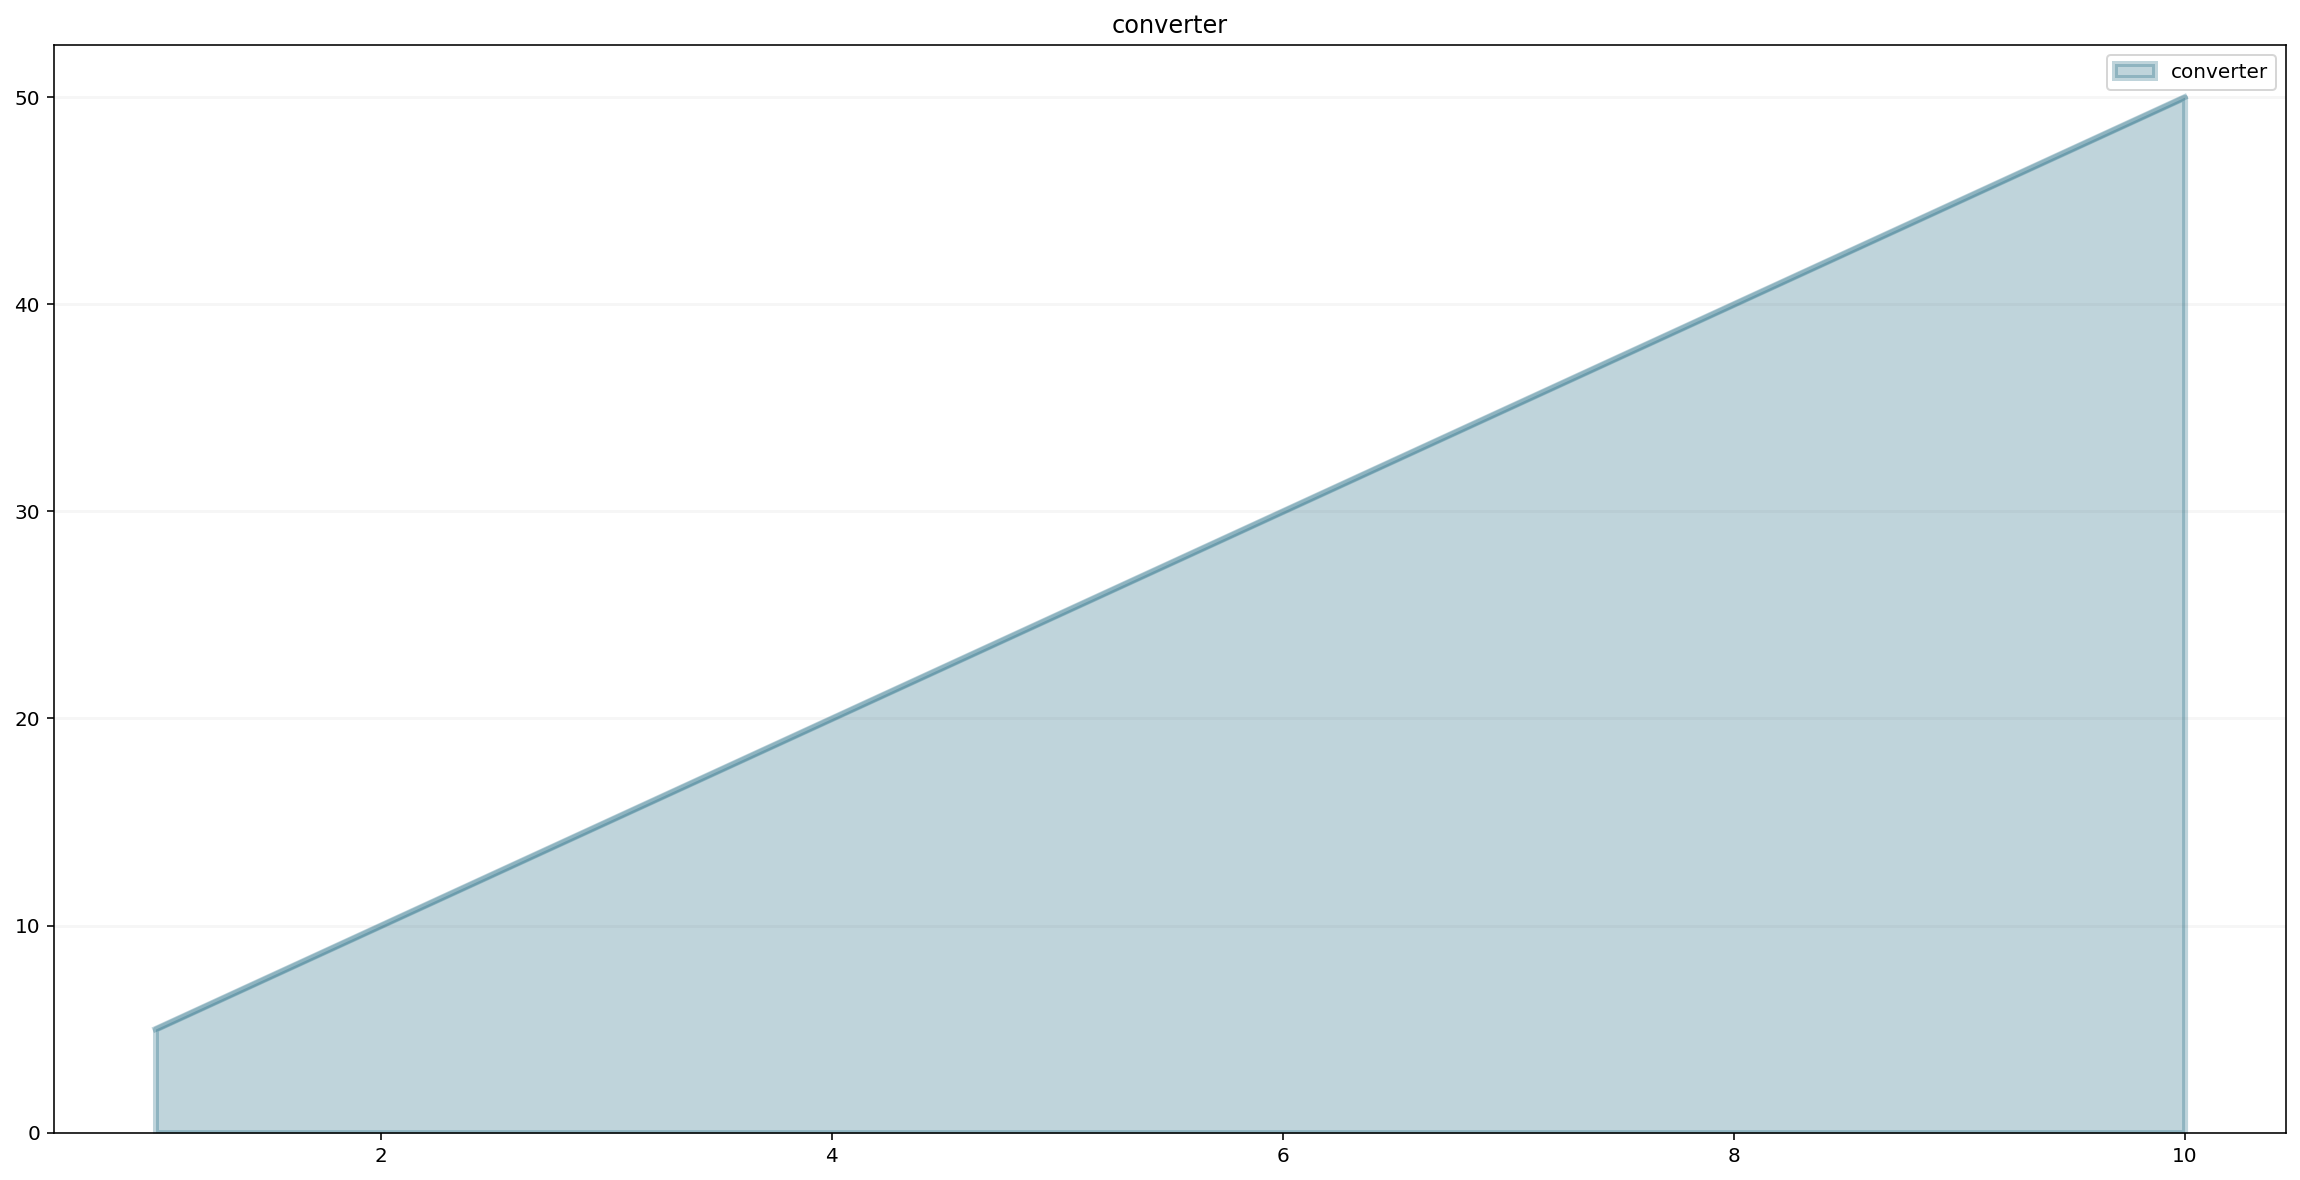

In [8]:
converter.plot()

We can also create a stock that has the converter as an inflow:

In [9]:
stock = model.stock("stock")

In [10]:
stock.equation = converter

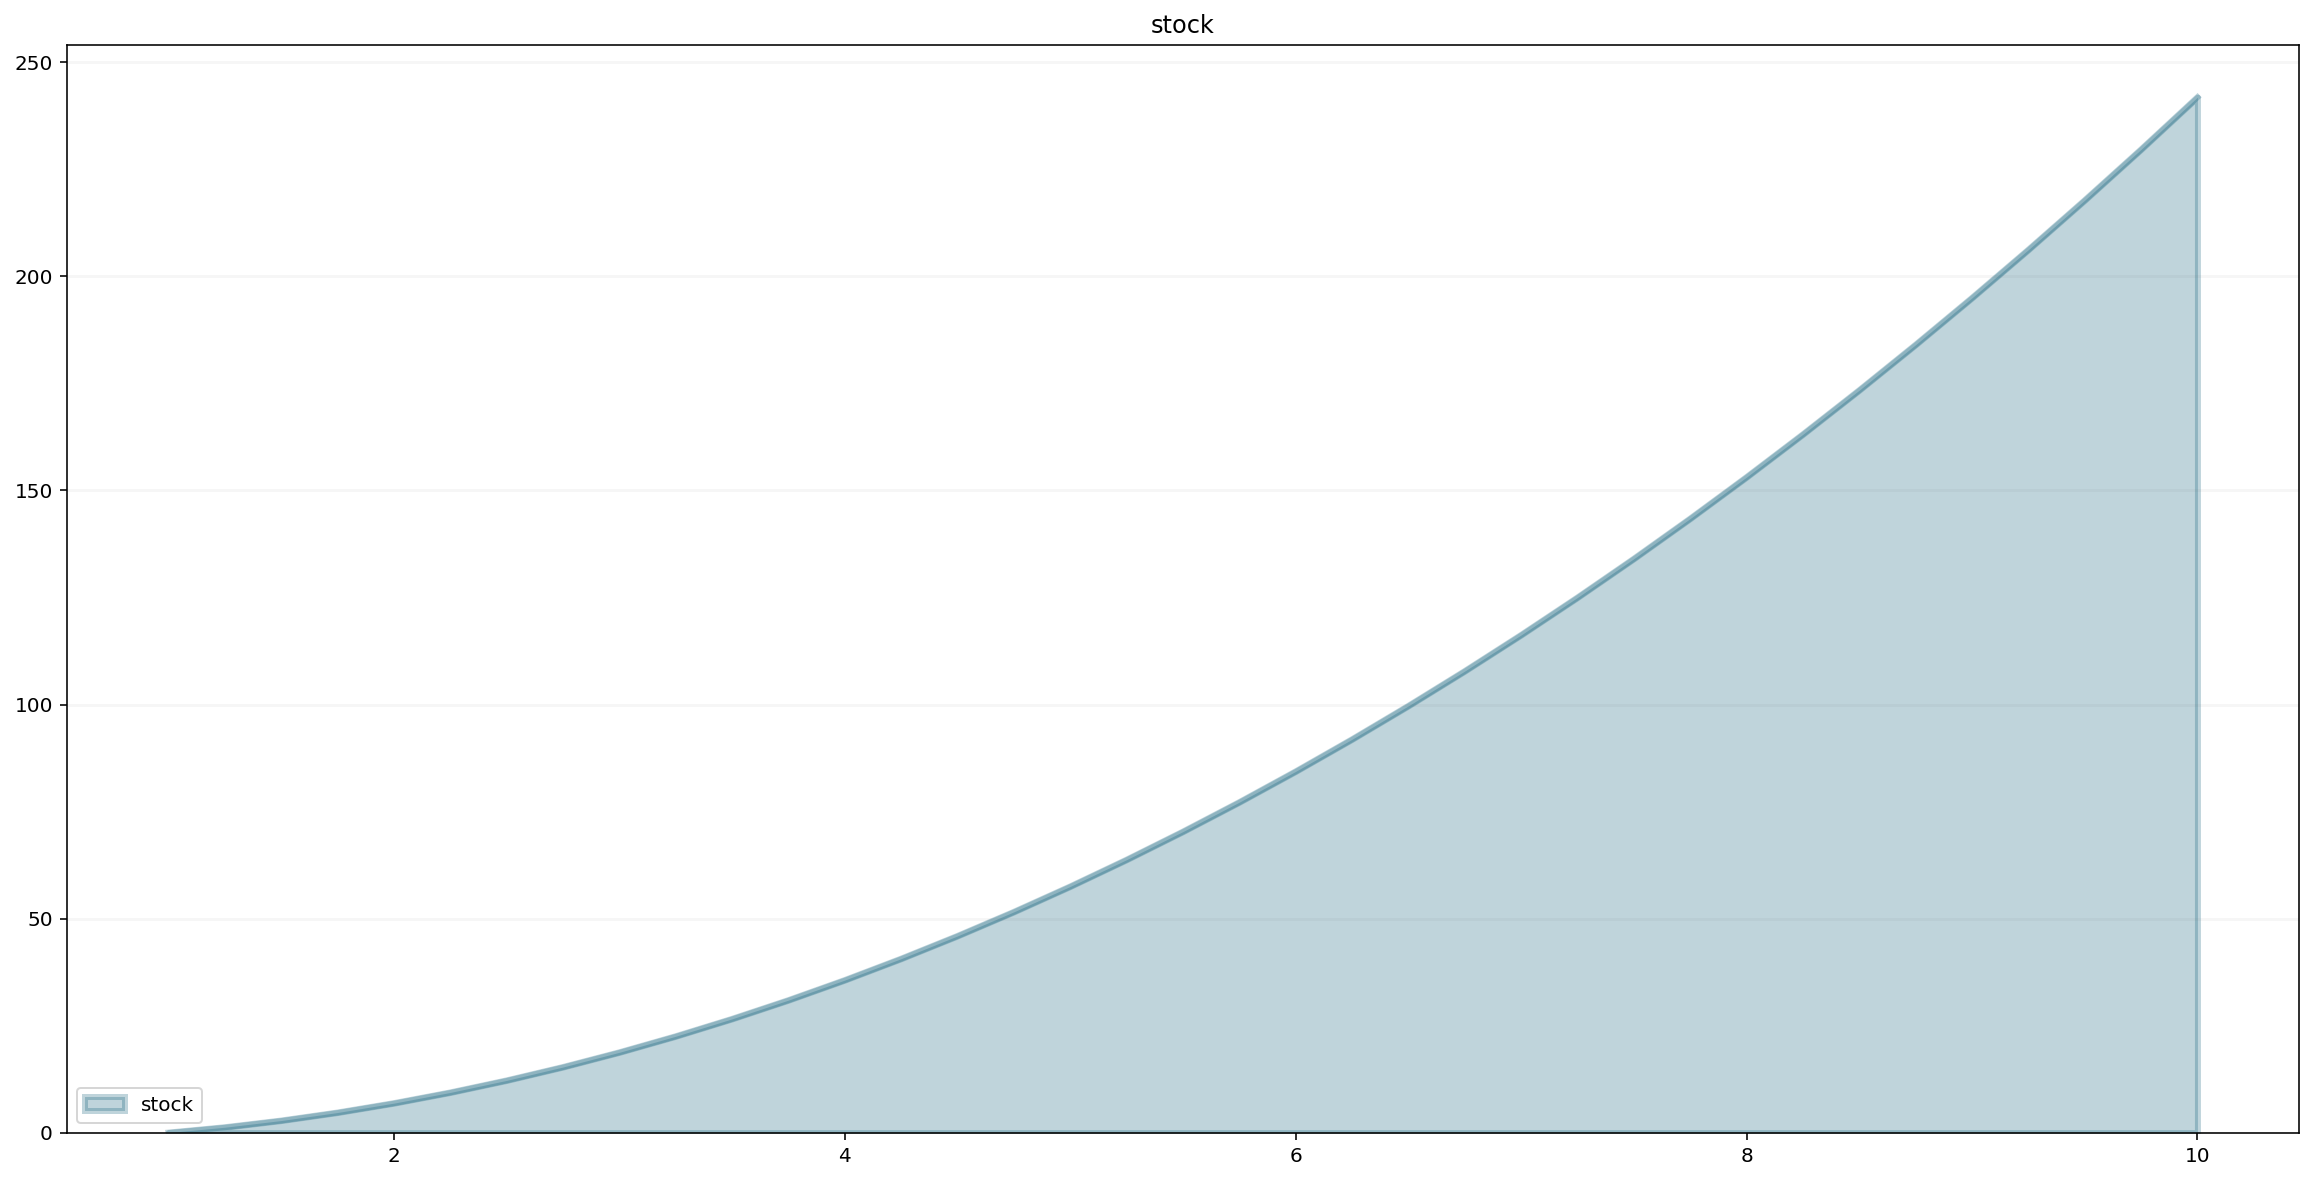

In [11]:
stock.plot()

We can do all the usual arithmethic:

In [12]:
stock.equation=converter/(sd.time())

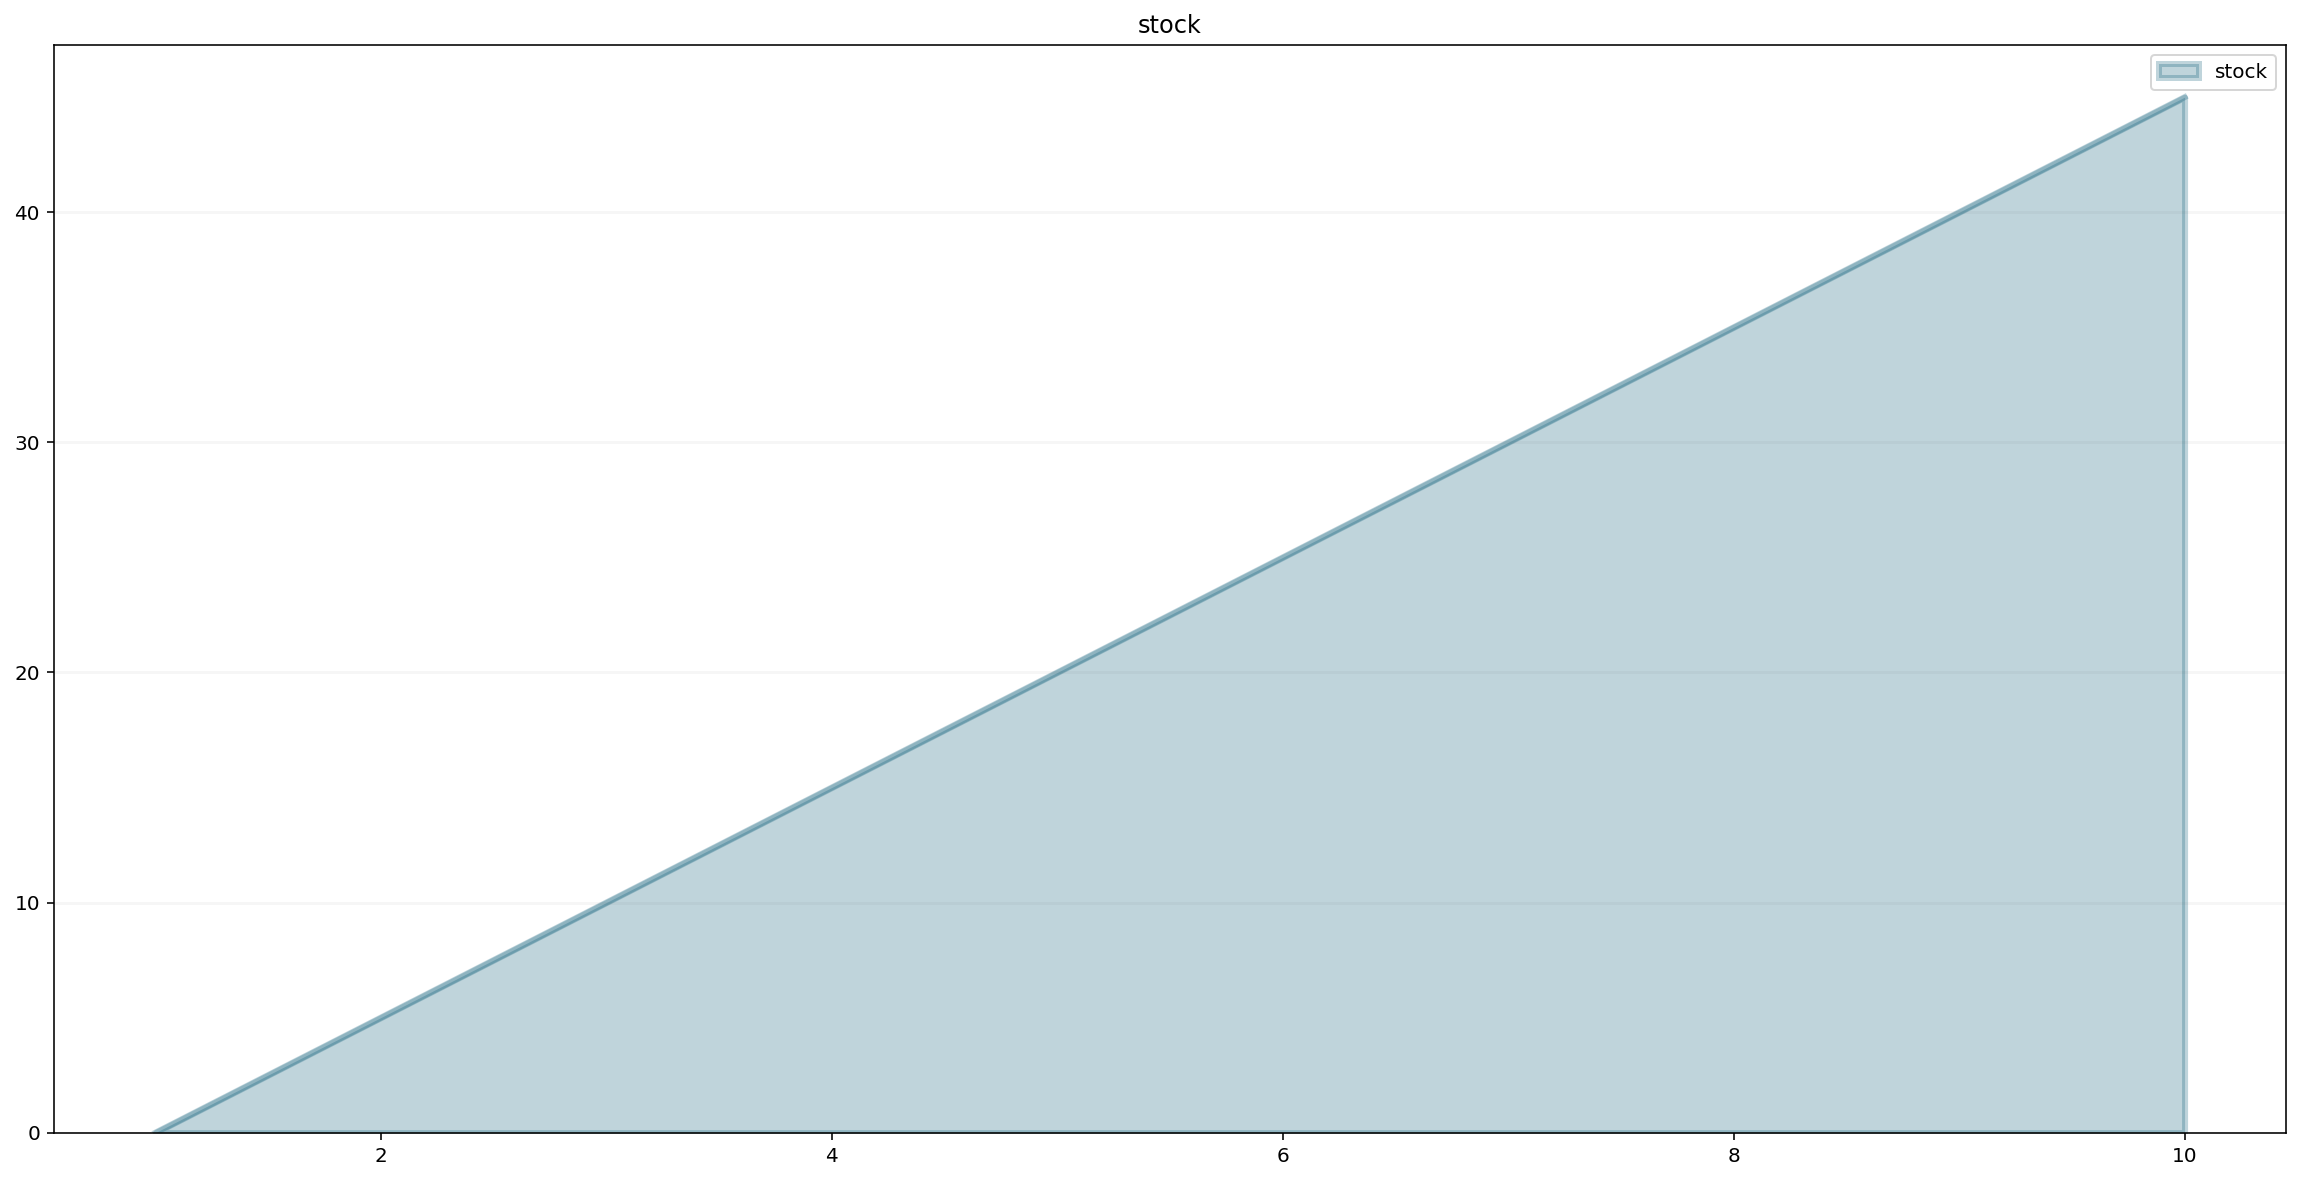

In [13]:
stock.plot()

The function we created above was just dependent on time and not on other model variables. Let's create a function that takes more arguments, e.g. one that multiplies a model variable with time.

You can add as many arguments as you like, but they must come after the ``model`` and ``t`` arguments.

In [14]:
another_model_function = model.function("another_model_function", lambda model, t, input_function, multiplier : t*input_function*multiplier)

Define a new converter which will be the input for the function:

In [15]:
input_function = model.converter("input_function")

In [16]:
input_function.equation= 5.0

In [17]:
multiplier = model.converter("multiplier")

In [18]:
multiplier.equation=1.0

Now add a converter which will apply the ``another_model_function``:

In [19]:
another_converter = model.converter("another_converter")

In [20]:
another_converter.equation=another_model_function(input_function, multiplier)

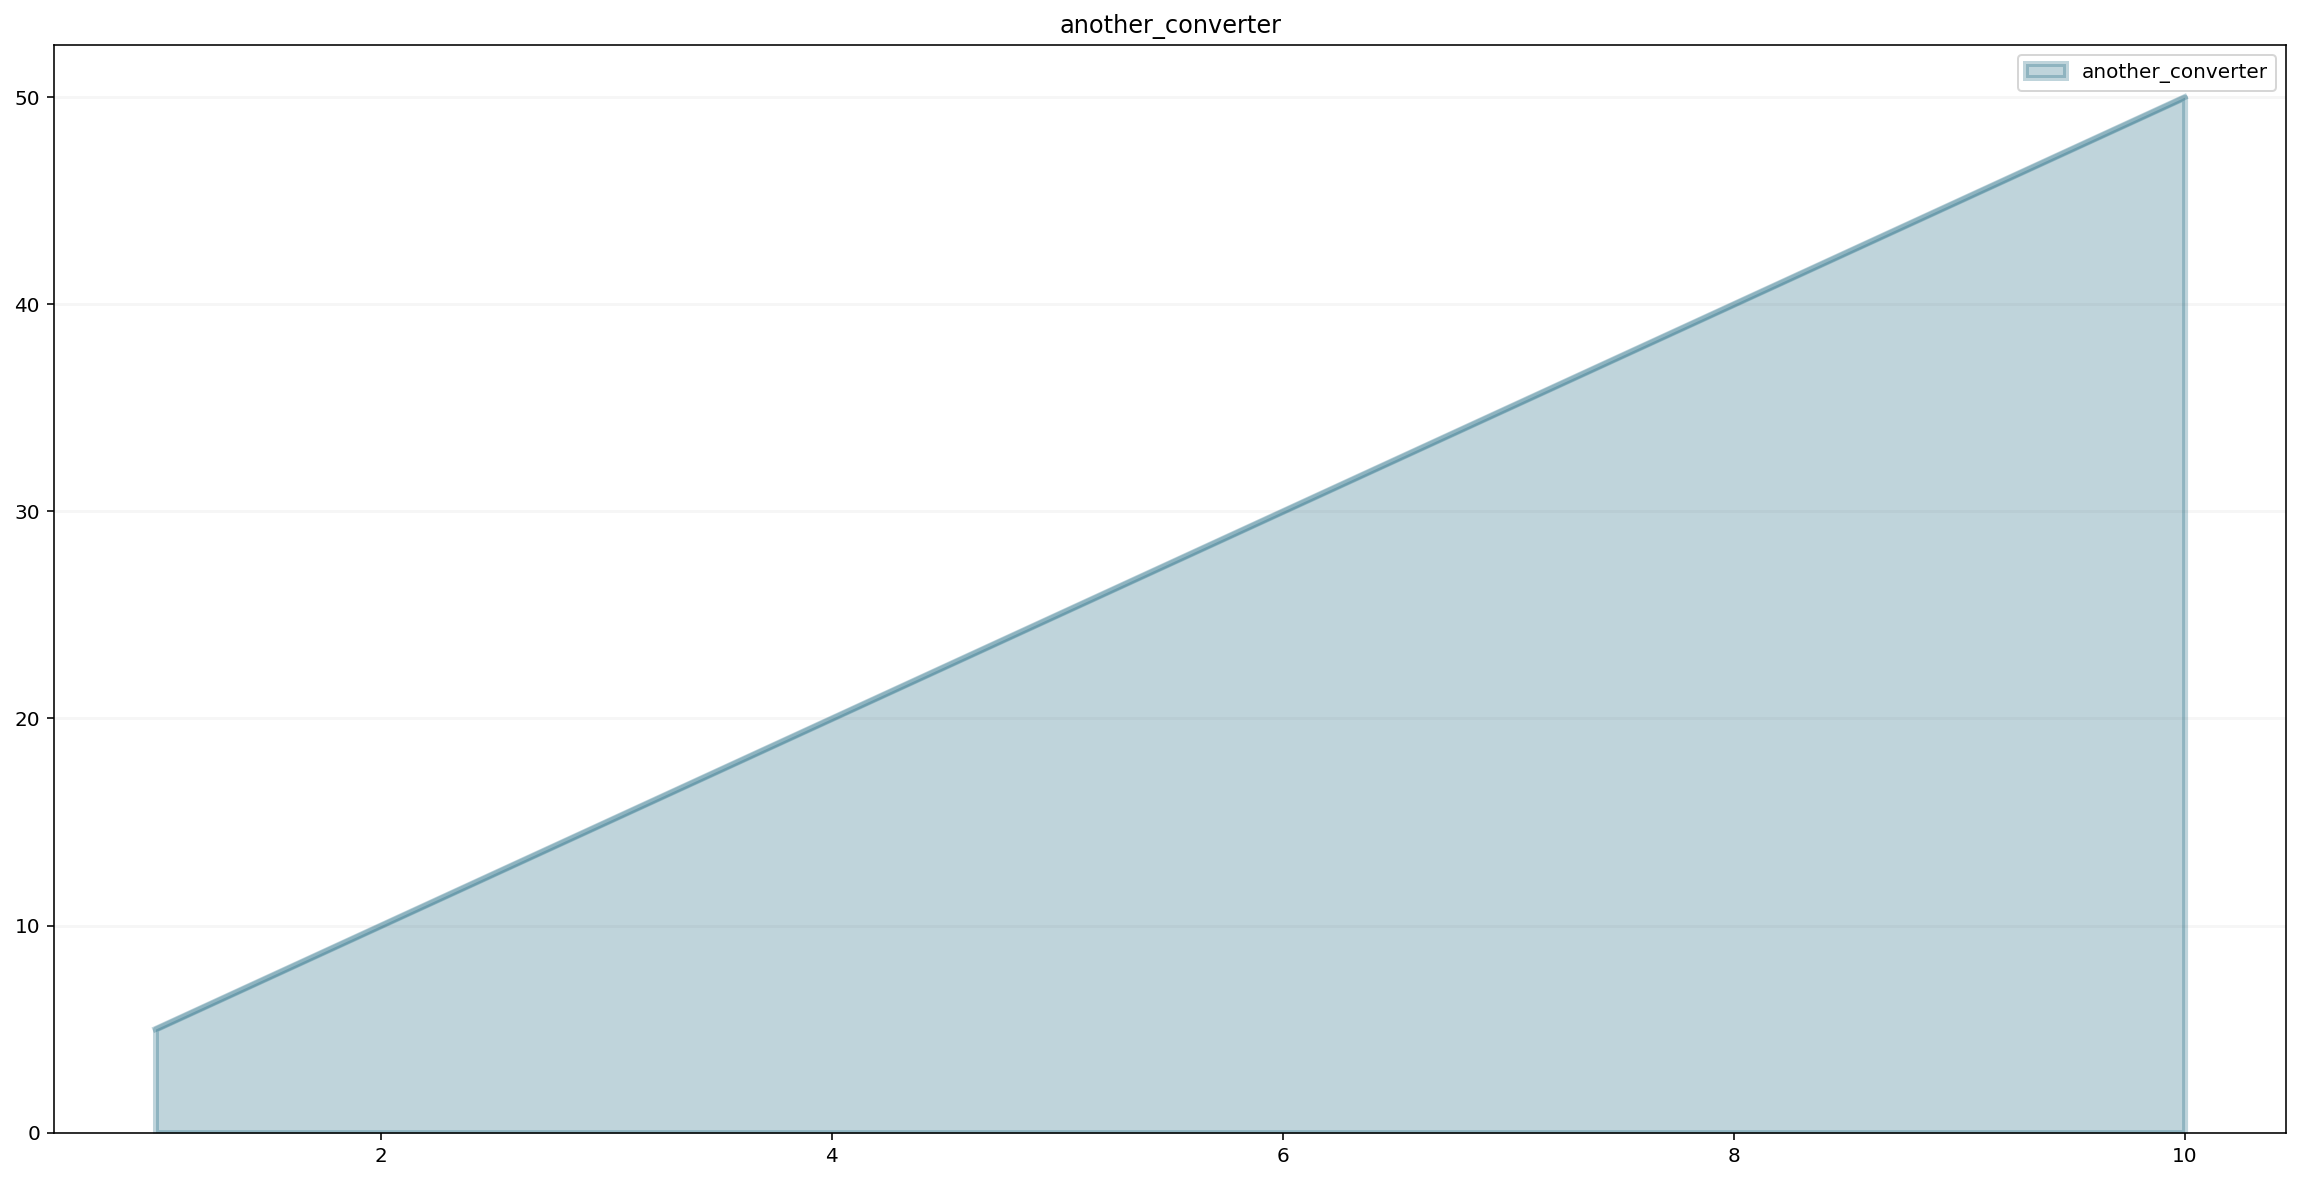

In [21]:
another_converter.plot()

In [22]:
from BPTK_Py.bptk import bptk
import numpy as np
bptk=bptk()

Of course functions defined in this way can also be used within scenarios. The quickest way to set up a scenario manager for a given model is as follows:

In [23]:
bptk.register_model(model)

This automatically creates a scenario manager whose name is the name of the model with the prefix "sm" and a base scenario. The models name is normalized to start with a capital letter (so TestModel is converted to smTestmodel).

It also creates a "base" scenario which runs the model as-is, without any changed settings.

You can list all scenarios and scenario managers using the `list_scenarios` method.

In [24]:
bptk.list_scenarios(scenario_managers=["smTestmodel"])


*** smTestmodel ***
	 base


Let's add some new scenarios:

In [25]:
bptk.register_scenarios(
    scenarios =
        {
            "multiplier5": {
                "constants": {
                    "multiplier": 5.0
                }
            },
            "multiplier10": {
                "constants": {
                    "multiplier": 10.0
                }
            },
            "multiplier15": {
                "constants": {
                    "multiplier": 15.0
                }
            }
        }
    ,
    scenario_manager="smTestmodel")

In [26]:
bptk.list_scenarios(scenario_managers=["smTestmodel"])


*** smTestmodel ***
	 base
	 multiplier5
	 multiplier10
	 multiplier15


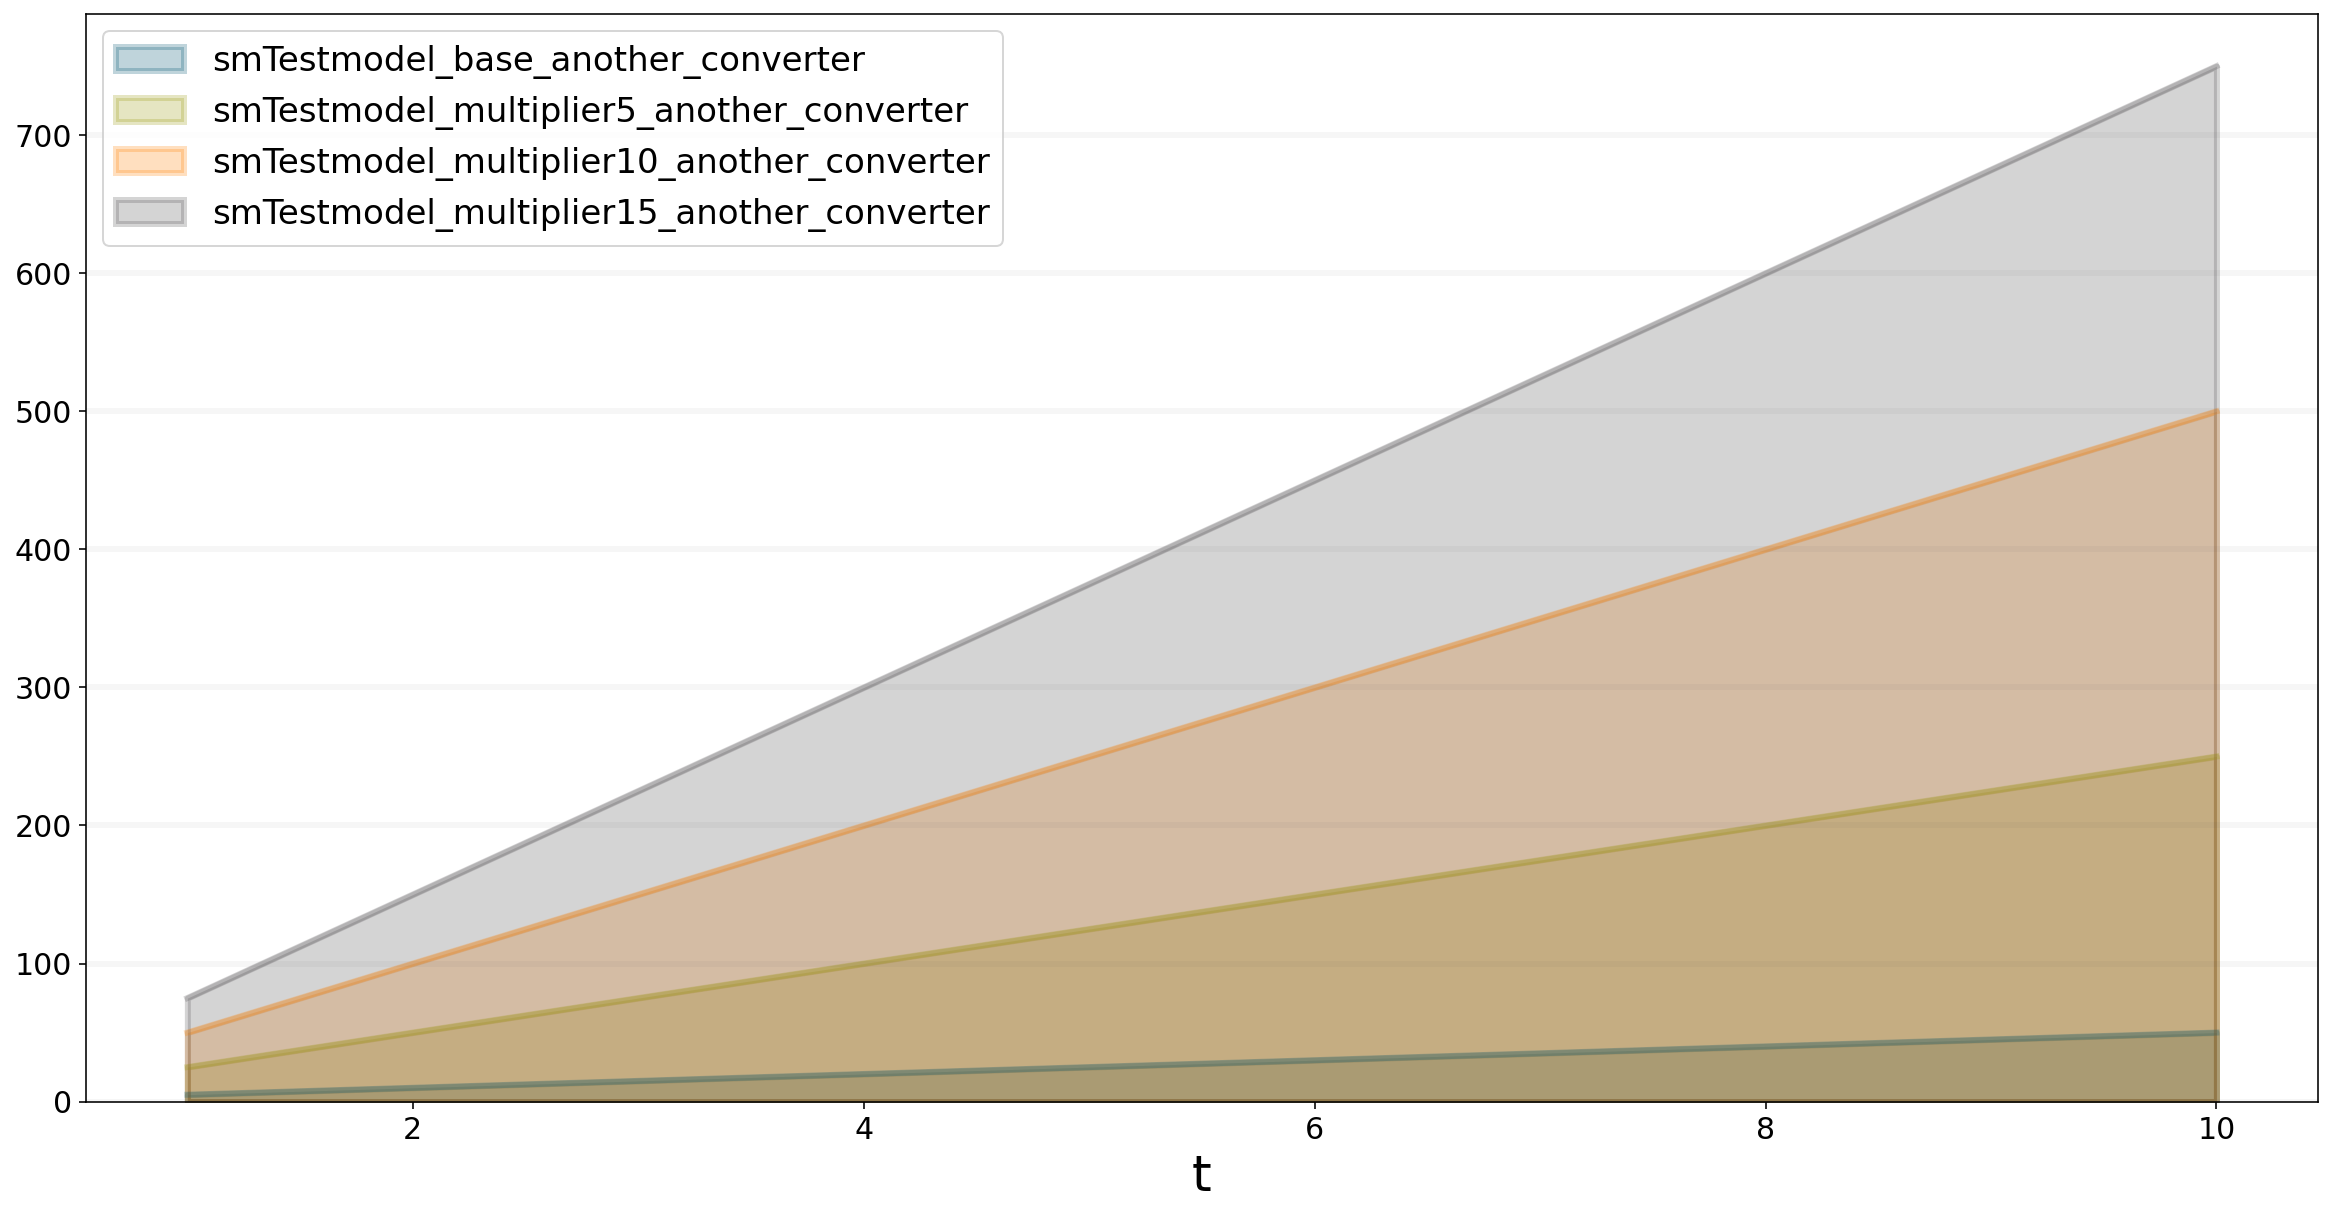

In [27]:
bptk.plot_scenarios(scenario_managers=["smTestmodel"],scenarios=["base","multiplier5","multiplier10","multiplier15"],equations=["another_converter"])